# Modelo de Puntuación Crediticia
<img style="float: right; margin: 15px 15px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/d/db/Logo_ITESO_normal.jpg" title="git" width="100" height=".99">

**Modelos de Crédito**

#### Mtro. Rodolfo Slay Ramos


### Equipo:
##### Villaseñor Rubio, Andrés
##### Ledezma Tamez, Mauricio 
##### Sánchez Paszko, José Walden


<!DOCTYPE html>
<html lang="en">
  <head>
    <meta charset="UTF-8" />
    <meta name="viewport" content="width=device-width, initial-scale=1.0" />
    <title>Absrtact</title>
    <style>
      .boxed {
        background: #F2F2F2;
        color: black;
        border: 3px solid #535353;
        margin: 0px auto;
        padding: 10px;
        border-radius: 10px;
      }
    </style>
  </head>
  <body>
    <!-- This is the markup of your box, in simpler terms the content structure. -->
    <div class="boxed">
      <h3> Abstract </h2>
      <p> El modelo que se presentará a continuación utiliza el comportamiento histórico del cliente para determinar si es o no apto para recibir un nuevo crédito.
      <br>
      Cuenta con un accuracy de x %.
      </p>
    </div>
  </body>
</html>

## Índice
1. [Introducción](#introduction)
2. [Modelo](#model)
    - [Datos necesarios](#model.1)
    - [Supuestos](#model.2)
    - [Uso del modelo](#model.3)
    - [Desempeño](#model.4)
3. [Conclusiones](#findings)

<div id='introduction' class="alert alert-block alert-info"/>

## Introducción
En esta sección hablaremos sobre lo que se verá a continuación así como los objetivos del proyecto.

**Introducción**
 
La evaluación de la solvencia crediticia de individuos y empresas desempeña un papel crítico en el funcionamiento de la economía. Las instituciones financieras, prestamistas y empresas utilizan sistemas de puntuación crediticia para determinar el riesgo asociado con otorgar crédito a los solicitantes. Tradicionalmente, estos modelos de puntuación crediticia se basan en una serie de variables para evaluar la capacidad de un prestatario para cumplir con sus obligaciones crediticias.
 
En este proyecto se desarrolló un modelo tradicional basado en una base de datos proporcionada por el profesor, donde se tuvo que llevar a cabo la limpieza y la selección de las variables que consideramos más significativas para poder determinar el score crediticio de un individuo.

**Objetivos del Proyecto**
 
Los objetivos fundamentales de este proyecto son:
 
 1. Desarrollar un modelo de puntuación crediticia basado en datos de Excel previamente calificados.
 2. Identificar las variables clave en las hojas de cálculo de Excel que tienen un impacto significativo en la capacidad de un individuo o empresa para cumplir con sus obligaciones crediticias.
 3. Evaluar la precisión y la eficacia del modelo en la predicción de la solvencia crediticia.

<div id='model'  class="alert alert-block alert-info"/>

## Modelo
Texto del segundo apartado

<div id='model.1'/>

### Datos necesarios
Son los datos utilizados para crear el modelo, y los cuáles se necesitan para poder utilizarlo en un futuro

**Limpieza y Selecion de Datos**
 
Lo primero en lo que se centró nuestro equipo fue llevar a cabo una limpieza exhaustiva de todos los datos que nos parecían interesantes para explorar en nuestra base de datos. A partir de estos datos limpios, comenzamos a calcular índices de correlación para identificar cuáles son los datos más significativos a la hora de calcular el score crediticio.
 
Durante este proceso de limpieza, eliminamos cualquier información redundante como a su vez hicimos un proceso para normalisar los outliners que hacian mucho ruido a la hora de hacer la predicion, lo que nos permitió trabajar con datos de mayor calidad. La selección de las variables más relevantes se basó en su impacto en la evaluación de la solvencia crediticia y en su capacidad para predecir el riesgo crediticio de los solicitantes.
 
Al final al haber tantas variables que se podian utilizar decidimos basar nuestro modelo en el modelo FICO este siendo un modelo que se ha utilizado en el pasado con exito para esto mismo.

 **MODELO FICO**
 
Este método de valoración fue presentado en el año 1989 y su denominación responde a las siglas de Fair, Isaac and Company.
En su origen se consolidó rápidamente como un modelo pionero como elemento evaluador o calificador utilizando como raíz los datos históricos de agentes prestamistas.
 
Frente a otros modelos de evaluación crediticia, el puntaje FICO se diseña por medio de las siguientes variables relevantes:
 
1. **Historial de pagos**: Evalúa la capacidad anterior de pago hasta la fecha. Supone el 35% de la puntuación final.
2. **Utilización del crédito**: Mide el empleo realizado del crédito recibido. Esta variable cuenta con un peso del 30%.
3. **Longitud del historial del crédito**: Si el deudor es receptor habitual de financiación a crédito, el porcentaje aumentará. Supone el 15% de la nota.
4. **Nuevos créditos**: Dicha variable se dirige a evaluar la concentración o asunción de diversas deudas. En este caso se trataría de un 10%.
5. **Tipos de crédito utilizados** Trata de evaluar la experiencia del deudor a la hora de afrontar deudas de distintas naturalezas y riesgos crediticios. Suma hasta un 10% de la nota final. 

**NUEVO MODELO** 
 
Basandonos en el modelo FICO decidimos utilizar las variables que mas se parecian para poder tener un buen punto de inicio e ir tabajando sobre el mismo pero el factor diferencial siendo el peso que le aplicamos a cada variable
las variables que suamos fueron las siguientes:
 
1. **Outstanding Debt**: Evalúa la cantidad de deuda que tiene hasta la fecha.
2. **Delay_from_due_date**: Mide los atrasos que tiene en el buro
3. **Credit History Age**: Si el deudor es receptor habitual de financiación a crédito, el porcentaje aumentará. 
4. **Number of Credit Card s**: mide la capacidad de manejar el  credito del deudor
5. **Number of Loans** Trata de evaluar la experiencia del deudor a la hora de afrontar deudas de distintas naturalezas y riesgos crediticios.

**Datos**

La información con la que contamos viene de esta forma:

In [1]:
import warnings
import numpy as np
import pandas as pd
from cleanData import clean
import matplotlib.pyplot as plt
from prediction import setScore

warnings.filterwarnings('ignore')

data = pd.read_csv('train.csv')
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


Los datos después de limpiarlos quedan así, lo que ya nos permite estudiarlos para determinar el modelo.

In [2]:
data_clean = clean(data)
data_clean.head()

,Monthly_Inhand_Salary,Num_Credit_Card,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Monthly_Balance,Credit_Score,Score
ID,,,,,,,,,,,,
0x1602,1824.843333,4,4,3,7.0,4.0,809.98,26.822620,22.0,312.494089,Good,3
0x1603,1824.843333,4,4,-1,7.0,4.0,809.98,31.944960,22.0,284.629162,Good,3
0x1604,1824.843333,4,4,3,7.0,4.0,809.98,28.609352,22.0,331.209863,Good,3
0x1605,1824.843333,4,4,5,4.0,4.0,809.98,31.377862,22.0,223.451310,Good,3
0x1606,1824.843333,4,4,6,4.0,4.0,809.98,24.797347,22.0,341.489231,Good,3


<div id='model.2'/>

### Supuestos
Cosas que el modelo asume siempre serán así.

- El modelo asume que ya tiene historial crediticio, si no penalizará al cliente aunque sea un buen pagador.
- Se asume que el futuro será igual al pasado, por lo que si el cliente pagó a tiempo sus deudas, lo hará en un futuro.
- Asume que sus ingresos son estables, dado que no se toma en cuenta el origen de sus ingresos.

<div id='model.3'/>

### Uso del modelo
Aplicando el modelo generado.

<Axes: >

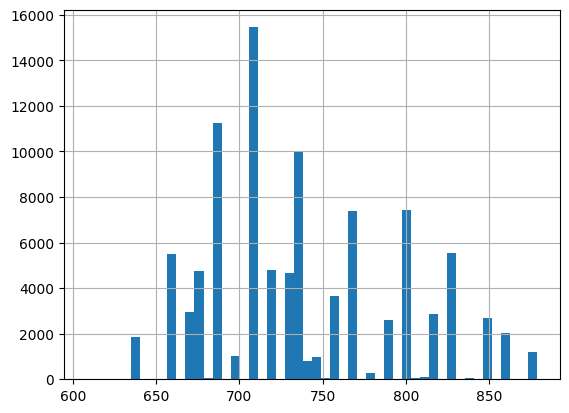

In [3]:
setScore(data_clean)[['Score_Predicted_in_points','Score_Predicted_in_bracket']]['Score_Predicted_in_bracket'].hist(bins = 50)

<div id='model.4'/>

### Desempeño
Texto del segundo apartado

<div id='findings' class="alert alert-block alert-info" />

## Conclusiones
Retos encontrados y descubrimientos

Este proyecto fue verdaderamente desafiante en múltiples aspectos. En primer lugar, nos enfrentamos al reto de adquirir información que fuese utilizable de manera efectiva. Los datos iniciales con los que contábamos requerían una laboriosa limpieza antes de poder utilizarlos en nuestro modelo. Fue fundamental distinguir entre errores en los datos, que debían corregirse, y datos válidos que simplemente se encontraban fuera de lo común (outliers), los cuales podían afectar significativamente nuestros resultados si no se manejaban adecuadamente.
Además, la modelización resultó ser un proceso sumamente complicado. No podíamos simplemente asignar coeficientes a las variables y multiplicarlos para obtener un score crediticio. Nuestros intentos iniciales, como penalizar a los usuarios con 10 puntos por cada tarjeta de crédito adicional que poseían, no generaban resultados satisfactorios. Esto se debía a que la relación entre las variables y el score no era de naturaleza lineal. Así que, tuvimos que adoptar un enfoque más sofisticado y elaborar un modelo que capturara las relaciones complejas y no lineales entre las variables.

En este sentido, otro desafío importante consistió en determinar el procedimiento correcto para definir los rangos (brackets) adecuados para cada variable y encontrar la ponderación precisa de cada una de ellas en el cálculo del score crediticio. Esta tarea requería un análisis minucioso y la consideración de múltiples factores, ya que la importancia de cada variable podía variar en función del contexto y del conjunto de datos.
A pesar de los obstáculos, este proyecto nos permitió desarrollar un modelo sólido basado en el modelo FICO, que ha demostrado ser eficaz en la evaluación de la solvencia crediticia. Aprendimos la importancia de la limpieza de datos, la gestión de outliers y la necesidad de abordar las relaciones no lineales en nuestro enfoque. En resumen, este proyecto representó una valiosa experiencia en la aplicación de técnicas de análisis de datos y modelado en un contexto real y desafiante.